C:\Users\Usuario\AppData\Local\Temp\ipykernel_11844\4036273330.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = weights.contiguity.Queen.from_dataframe(gdfm)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 8 islands with ids: 816, 2536, 5326, 7061, 7160, 7229, 8106, 8107.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 816, ' is an island (no neighbors)')
('WARNING: ', 2536, ' is an island (no neighbors)')
('WARNING: ', 5326, ' is an island (no neighbors)')
('WARNING: ', 7061, ' is an island (no neighbors)')
('WARNING: ', 7160, ' is an island (no neighbors)')
('WARNING: ', 7229, ' is an island (no neighbors)')
('WARNING: ', 8106, ' is an island (no neighbors)')
('WARNING: ', 8107, ' is an island (no neighbors)')


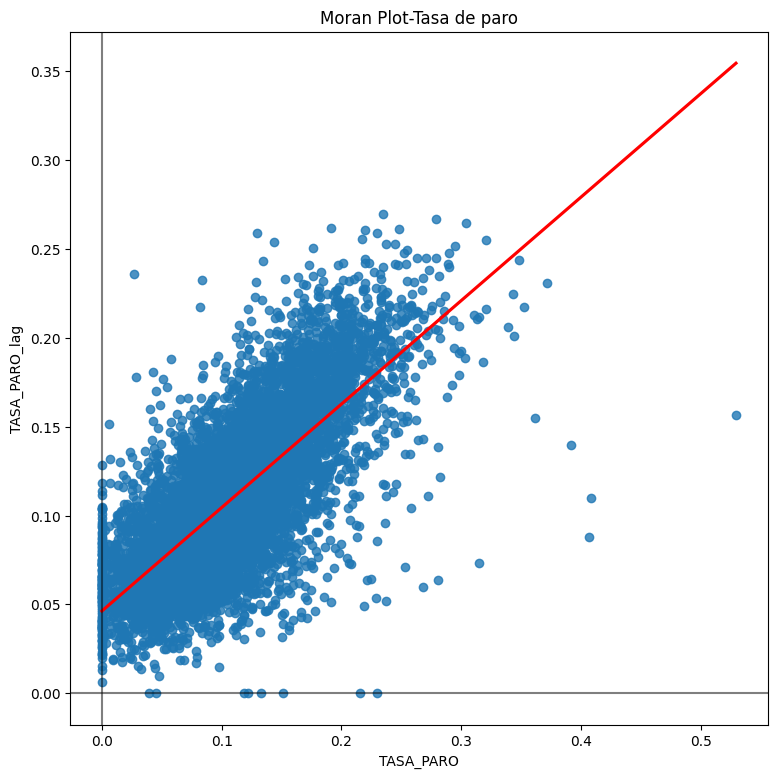

In [2]:
import geopandas as gdp
import matplotlib.pyplot as plt
import seaborn as sns
from pysal.lib import weights
from pysal.explore import esda

gdfm = gdp.read_file("2_Espacial/CartografiasDatos_Python/cartografias/Munic04_ESP.shp")

wq = weights.contiguity.Queen.from_dataframe(gdfm)
wq.transform = "R"

gdfm["TASA_PARO_lag"] = weights.spatial_lag.lag_spatial(wq, gdfm["TASA_PARO"])

f, ax=plt.subplots(1, figsize=(9,9))
sns.regplot(
    x="TASA_PARO",
    y="TASA_PARO_lag",
    ci=None,
    data=gdfm, 
    line_kws={"color":"r"})
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot-Tasa de paro")
plt.show()

In [4]:
from esda.moran import Moran

moran = Moran(gdfm["TASA_PARO"], wq)

print("I de Moran:", moran.I.round(3))
print("p-valor:", moran.p_sim)

I de Moran: 0.584
p-valor: 0.001
